In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import timeit
import time

 

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [2]:
df_pre = pd.read_csv(R"/Users/tejasgorla/VScode/MATE50001-Computing/Computing-Challenge2022/Preprocessed file.csv")
df_pre.drop('Unnamed: 0', inplace=True, axis=1)
df_pre

,v(A),r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),tG,τ,μ,Lowest distortion
0,0.0,0.387755,0.314286,0.740260,0.730159,0.494922,0.632855,0.206526,0.579628,0.450,rhombohedral
1,0.0,0.387755,0.314286,0.740260,0.841270,0.494922,0.058835,0.442386,0.592154,0.075,cubic
2,0.0,0.387755,0.314286,0.740260,0.396825,0.494922,0.281998,0.392439,0.579622,0.150,rhombohedral
3,0.0,0.387755,0.314286,0.740260,0.634921,0.494922,0.326314,0.493846,0.609865,0.000,cubic
4,0.0,0.387755,0.314286,0.740260,0.753968,0.494922,0.444628,0.459367,0.597470,0.050,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...
644,0.5,0.244898,0.314286,0.201299,0.349206,0.267856,0.245369,0.264963,0.626431,0.075,orthorhombic
645,0.5,0.244898,0.314286,0.201299,0.420635,0.267856,0.016747,0.313735,0.616744,0.000,orthorhombic
646,0.5,0.244898,0.314286,0.201299,1.000000,0.267856,0.000000,0.186833,0.666246,0.200,orthorhombic
647,0.5,0.244898,0.314286,0.201299,0.182540,0.267856,0.401449,0.097941,0.758633,0.350,orthorhombic


In [5]:
def BestValues(df_pre):
    columns=list(df_pre.columns)
    index = columns.index("Lowest distortion")
    #remove Lowest column from data set to compare
    y_col = columns.pop(index)
    y = df_pre[y_col].to_numpy()
    X = df_pre[columns].to_numpy()
    X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

 

    rfc=RandomForestClassifier()
    
    a=time.time()
    param_grid = { 
    'n_estimators': [30,40,50,60,70,80],
    'max_depth' : [6,7,8,9,10],
    'criterion' :['gini', 'entropy']
    }
    
    rfc_optimisedParams = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5)
    rfc_optimisedParams.fit(X_train, y_train)
    
    BestParams = rfc_optimisedParams.best_params_
    print(BestParams)
    
    return BestParams


def RanForest(BestParams):
    columns=list(df_pre.columns)
    index = columns.index("Lowest distortion")
    #remove Lowest column from data set to compare
    y_col = columns.pop(index)
    y = df_pre[y_col].to_numpy()
    X = df_pre[columns].to_numpy()
    X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3)

    #print(Bestparams.values())
    rfc1=RandomForestClassifier(max_features='auto', n_estimators= 32, max_depth=10, criterion='gini')
    rfc1.fit(X_train, y_train)
    
    pred=rfc1.predict(X_test)
    #print(pred)
    #print(y_test)
    #print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred)
    return pred, y_test

 

def conf_matrix(ytest, predict):
    structure = ["cubic", "orthorhombic", "tetragonal", "rhombohedral"]
    conf_matrix = confusion_matrix(ytest, predict, labels=structure)
    conf_matrixper = conf_matrix/np.sum(conf_matrix)
    #structure = ["cubic","orthorhombic","tetragonal","rhombohedral"]
    conf_matrixper = pd.DataFrame(conf_matrixper, index=structure, columns=structure)
    return conf_matrixper

 

Bestparams = BestValues(df_pre)
#print(Bestparams)
#pred, y_test = RanForest(Bestparams)

 

#conf_matrixper

 

col = ["r(AXII)(Å)",'r(AVI)(Å)','EN(A)','EN(B)',"l(A-O)(Å)","l(B-O)(Å)","tG","τ","μ", "v(A)"]



for i in (col):
    #print(df_pre)
    df=df_pre.copy().drop(i,axis=1)
    # define new test data 
    pred, y_test = RanForest(Bestparams)
    #score, Lr = LogReg(X_train, X_test, y_train, y_test)
    #call RF
    #RF = RanForest(X_train, X_test, y_train, y_test)
    #Return predictions
    #bestpredict,finalscore,y_testfinal = findbeststratkfold(X_train, X_test, y_train, y_test, RF)
    #return conf matrix and
    conf = conf_matrix(y_test, pred)
    conf = pd.DataFrame(conf)
    print(conf)
    print('Acuracy', accuracy_score(y_test,pred))
    conf.to_csv(f"{i}.csv")
    
print(pred)
print(y_test)

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 30}


NameError: name 'BestParams' is not defined

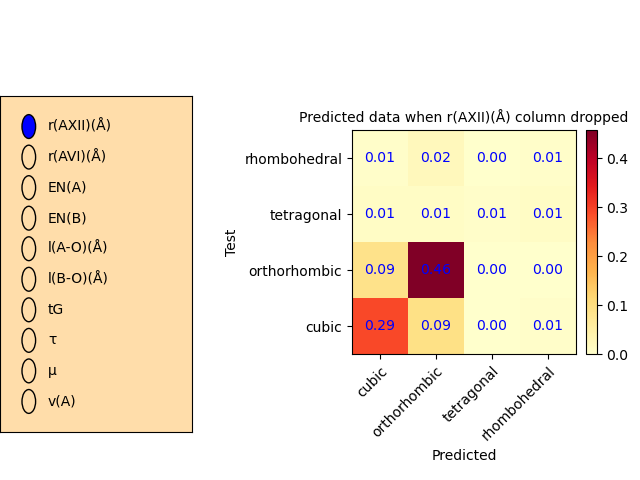

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# plot confusion matrix
fig, ax = plt.subplots()
col = ['r(AXII)(Å)','r(AVI)(Å)','EN(A)','EN(B)',"l(A-O)(Å)",'l(B-O)(Å)','tG','τ','μ','v(A)']
structure = ["cubic","orthorhombic","tetragonal","rhombohedral"]
array = pd.read_csv('r(AXII)(Å).csv',index_col=[0])
array = np.array(array)
img = ax.imshow(array, cmap='YlOrRd', origin='lower')
#bar  = plt.colorbar(img, )
axins = inset_axes(ax,
                    width="5%",  
                    height="100%",
                    loc='center right',
                    borderpad=-1.5
                   )
fig.colorbar(img, cax=axins, orientation = "vertical")
plt.subplots_adjust(left=0.55)
for i in range(len(array)):
    for j in range(len(array)):
        text = ax.text(j, i, '%.2f' % array[i, j],
                       ha="center", va="center", color="b")

# label
def set_labels():
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Test')
    fig.set_label('Predicted vs Test')
    # set tick labels
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(structure)
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(structure)
    ax.set_title(f"Predicted data when {col[0]} column dropped", fontsize =10)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

set_labels()

#Rotate ticks
#plt.xticks(rotation = 90)

# create radio box
radio_ax = plt.axes([0.0, 0.1, 0.3, 0.7], facecolor='#FFDDAA')

# create radio buttons
radio = RadioButtons(radio_ax, col)

# callback function to run when buttons are pressed
def callback(label):
    ax.cla()
    set_labels()
    array = pd.read_csv(f'{label}.csv',index_col=[0])
    array = np.array(array)
    #clear(array)
    for i in range(len(array)):
        for j in range(len(array)):
            text = ax.text(j, i, '%.2f' % array[i, j],
                        ha="center", va="center", color="b")
    ax.imshow(array, cmap='YlOrRd', origin='lower')
    ax.set_title(f"Predicted data when {label} column dropped", fontsize =10)
    return text
# connect function to radio object and show
radio.on_clicked(callback)
plt.show()